<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Classificação
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Classificação;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever a espécie do penguin (**species**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [55]:
import sklearn
import graphviz
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [56]:
model = DecisionTreeClassifier()

In [57]:
penguim = sns.load_dataset('penguins')

In [58]:
penguim.head(1)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male


### **1.1. Análise exploratória**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos numéricos por espécie:

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim.drop(['sex', 'island'], axis=1), hue="species", palette="pastel")

**Comentário:**

Observando do pontos de vista das especies,
os Gentoo sao os maiores e mais pesados, e destacando que a maior quantidade
de pinguins da especie Adelie.

 - Sexo por espécie:

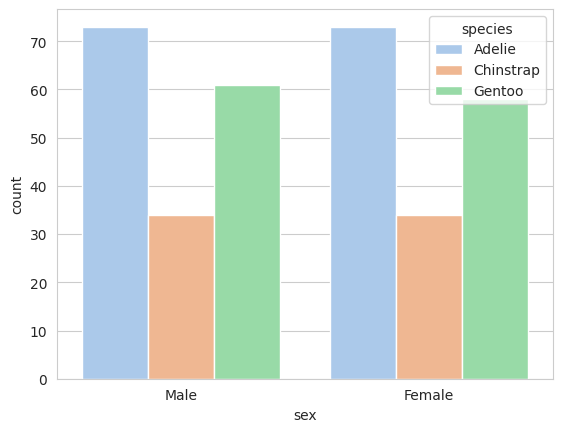

In [60]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='sex', hue="species", palette="pastel")

**Comentário:**

A maior quantidade de individuos da especie Adelie
tanto do sexo masculino quanto de femeas, os Chinstrap juntos
os dois sexos não são nem metade da quantidade total da especies Gentoo.

 - Ilha por espécie:

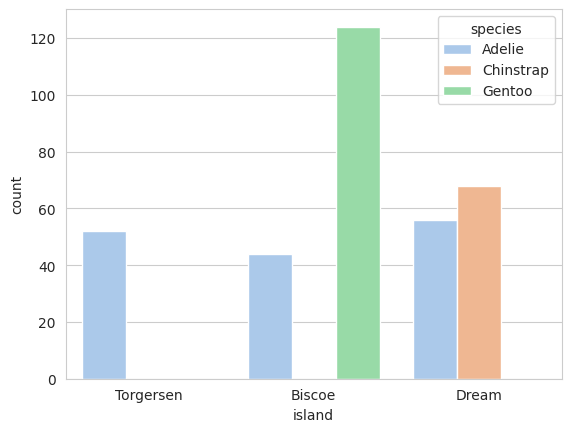

In [61]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='island', hue="species", palette="pastel")

**Comentário:**
há Aldelie em todas as ilhas estudadas, por isso seu numero e maior
porem o Gentoo dominam a ilha de Biscoe.

## 2\. Dados

### **2.1. Valores nulos**

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [ ]:
# resposta da questão 2.1
# verificar se á dados faltantes
dados_faltantes_total = penguim.isnull().any()
print( dados_faltantes_total)

In [25]:
# Para lidar com dados faltantes uma das opções e descarta as linha onde
# há dados faltantes.
penguim_df_limp = penguim.dropna()

In [ ]:
dt_teste = penguim_df_limp.isnull().any()
print(dt_teste)

### **2.2. Variáveis categóricas**

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

> **Nota**: Por definição, árvores de decisão **não precisam** da transformação de atributos categóricos em numéricos. Contudo, por **limitação** do pacote Python Scikit Learn, devemos conduzir esta etapa. Mais informações neste [link](https://scikit-learn.org/stable/modules/tree.html#tree).

In [27]:
# resposta da questão 2.2

# respota mais aceitavel para a coluna "island"

islanda_nom = pd.get_dummies(penguim_df_limp['island'])
islanda_nom.columns = [ str(col) + '_nrm'  for col in islanda_nom.columns]

penguim_df_limp = pd.concat([penguim_df_limp,islanda_nom], axis=1)

# Repetir o processo com a coluna "sex"

sex_m = pd.get_dummies(penguim_df_limp['sex'])
sex_m.columns = [ str(col) + '_nrm'  for col in sex_m.columns]

penguim_df_limp = pd.concat([penguim_df_limp,sex_m], axis=1)



In [62]:
penguim_df_limp.head(1)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Biscoe_nrm,Dream_nrm,Torgersen_nrm,Female_nrm,Male_nrm
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1,0,1


### **2.3. Limpeza**

Descarte as colunas categóricas originais e mantenha a variável resposta na primeira coluna do dataframe.

In [28]:
# resposta da questão 2.3
penguim_df_limp = penguim_df_limp.drop(columns=['island','sex'],axis=1)

### **2.4. Treino/Teste**

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes.

In [30]:
# resposta da questão 2.4
predictors_train, predictors_test, target_train, target_test = train_test_split(
    penguim_df_limp.drop(['species'], axis=1),
    penguim_df_limp['species'],
    test_size=0.25,
    random_state=123
)

In [29]:
penguim_df_limp.head(1)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Biscoe_nrm,Dream_nrm,Torgersen_nrm,Female_nrm,Male_nrm
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1,0,1


In [31]:
predictors_train.shape

(249, 9)

In [32]:
target_test.shape

(84,)

## 3\. Modelagem

### **3.1. Treino**

Treine um modelo de **árvore de decisão** com os **dados de treino** (2/3). Gere o gráfico da árvore do modelo treinado e responda: quantas **folhas** a árvore treinada possui?

**Resposta:** 8 folhas

Em uma árvore de decisão estabelecer nós (decision nodes) que se relacionam entre si por uma hierarquia. Existe o nó-raiz (root node), que é o mais importante, e os nós-folha (leaf nodes), que são os resultados finais.
nesse caso 8 folhas.



In [36]:
# resposta da questão 3.1
#penguim_df_limp.head(1)
model_v1 = model.fit(predictors_train,target_train)

In [ ]:
tree_data = tree.export_graphviz(model_v1,out_file=None)
graf = graphviz.Source(tree_data)
graf

### **3.2. Avaliação**

**a.** Matriz de Confusão

Calcule e visualize a **matriz de confusão** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3). Comente os resultados.

**Comentário:**

Das falhas do algoritimo ele confundiu as especies mais populares com 5 erros
nas especies com menos individuos não houve erros!

In [40]:
#target_predicted = model_v1.predict(predictors_test)

In [64]:
# resposta da questão 3.2.a
target_predicted = model_v1.predict(predictors_test)
confusion_matrix = confusion_matrix(target_test,target_predicted)

In [43]:
print(confusion_matrix)

[[35  0  0]
 [ 5 21  0]
 [ 0  0 23]]


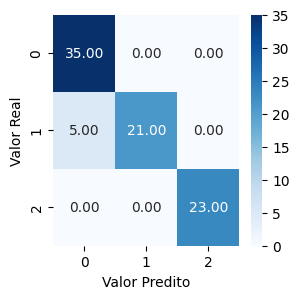

In [65]:
# resposta da questão 3.2.a


plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel("Valor Predito")
plt.ylabel("Valor Real")
plt.show()


**b.** Acurácia

Calcule a **acurácia** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui uma acurácia de approx. 96% (sua acurácia pode não ser igual).

In [53]:
# resposta da questão 3.2.b
acuracia  = accuracy_score(target_test,target_predicted)
#print(acuracia)

0.9404761904761905


In [54]:
print(f'{round(100 * acuracia,2)} %')

94.05 %


## 4\. Predição  

### **4.1. Novo penguim**

Qual a espécie de um penguim com as seguintes características:


| island | bill_length_mm | bill_depth_mm | flipper_length_mm | body_mass_g | sex |
| --- | --- | --- | --- | --- | --- |
| Biscoe | 38.2 | 18.1 | 185.0 | 3950.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2. A ordem dos atributos importa, deve ser a mesma usada na modelagem.

> **Nota:** Como referência eu obtive **adelie** como espécie predita (a sua predição pode não ser igual).

In [ ]:
# resposta da questão 4.1

novo_pin = np.array([
    38.2,  #bill_length_mm
    18.1,  #bill_depth_mm
    185.0, #flipper_length_mm	
    3950.0,#body_mass_g	
    1, # biscoe
    0, # Dream
    0, # Torgersen
    0, # female
    1  # Male
    ])

In [ ]:
especie_pred = model_v1.predict(novo_pin.reshape(1,-1))
print(especie_pred)

---